In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier

import seaborn as sb

# 1 - Machine Learning: méthodes classiques

## 1.1 - Regression linéaire simple: estimation du prix d'une pizza en fonction de son diamètre

In [2]:
train_df = pd.read_csv("data/data_train.csv", sep=";", decimal=",")
test_df = pd.read_csv("data/data_test.csv", sep=";", decimal=",")
train_df
# test_df

diameter  price
0         6    7.0
1         8    9.0
2        10   13.0
3        14   17.5
4        18   18.0

In [3]:
x_train = train_df.loc[:,['diameter']]
x_test = test_df.loc[:,['diameter']]

y_train = train_df.loc[:,['price']]
y_test = test_df.loc[:,['price']]

In [4]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [5]:
print("Prediction linéaire de y_test:")
y_pred

Prediction linéaire de y_test:


array([[ 9.77586207],
       [10.75215517],
       [12.70474138],
       [17.5862069 ],
       [13.68103448]])

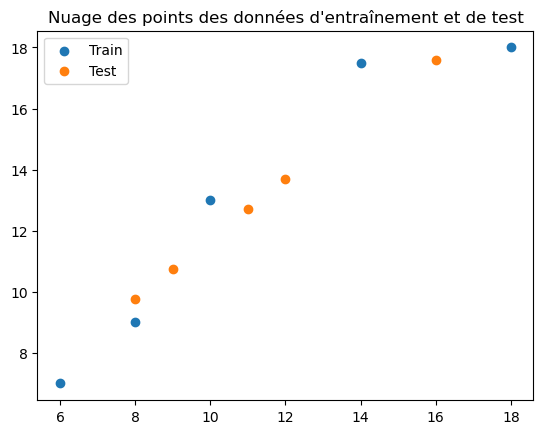

In [6]:
plt.scatter(x_train, y_train, label="Train")
plt.scatter(x_test, y_pred, label="Test")
plt.title("Nuage des points des données d'entraînement et de test")
plt.legend()
plt.show()

In [7]:
coef_corr = np.sqrt(model.score(x_test, y_test))

print(f"Coefficient de correlation pour les données de test: {coef_corr}")

Coefficient de correlation pour les données de test: 0.8136370769220483


## 1.2 - Problème de classification avec Decision Tree, SVM

In [8]:
data = pd.read_csv("data/student-por.csv", sep=",")
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [9]:
data['pass'] = data.apply(lambda row: 1 if (row['G1']+ row['G2'] + row['G3']) >= 35 else 0, axis=1)
data = data.drop(['G1', 'G2', 'G3'], axis=1)

data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences pass  
0       no       no       4         3      4    1    1      3        4    0  
1      yes       no       5         3      3    1    1      3        2    0  
2      yes       no       4         3      2    2    3      3        6    1  
3      yes      yes       3         2      2    1    1      5        0    1  
4       no       no       4         3      2    1    2      5        0    1  

[5 rows x 31 columns]

In [10]:
data = pd.get_dummies(data, columns=['sex', 'school', 'address', 'famsize',
                                     'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                                     'schoolsup', 'famsup', 'paid', 'activities',
                                     'nursery', 'higher', 'internet', 'romantic'])

data.head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0     1  ...           True           False       False         True   
1     1  ...           True           False        True        False   
2     2  ...           True           False       False         True   
3     1  ...          False            True       False         True   
4     1  ...           True           False       False         True   

   higher_no  higher_yes  internet_no  internet_yes  romantic_no  romantic_yes  
0      False        True         True         False         True         False  
1      False        True        False          True         True         False  
2      False        True        False          True         True         False  
3      False        True        False          True        False          True  
4      False        True         True         False         True         False  

[5 rows x 57 columns]

In [11]:
reussite = data['pass'].tolist().count(1)
pourcentage_reussite = (reussite * 100) / len(data['pass'])
echec = data['pass'].tolist().count(0)
pourcentage_echec = (echec * 100) / len(data['pass'])

In [12]:
print(f"Nombre de réussites: {reussite}")
print(f"Taux de réussite: {pourcentage_reussite}")
print(f"Nombre d'échecs: {echec}")
print(f"Taux d'échecs: {pourcentage_echec}")

Nombre de réussites: 328
Taux de réussite: 50.53929121725732
Nombre d'échecs: 321
Taux d'échecs: 49.46070878274268


In [13]:
x = data.loc[:, data.columns != 'pass']
y = data.loc[:, 'pass']

In [14]:
x_train = x.loc[:500, :]
y_train = y.loc[:500]
x_test = x.loc[500:, :]
y_test = y.loc[500:]

In [15]:
model = DecisionTreeClassifier(max_depth=5)
model = model.fit(x_train, y_train)

print(f"Précision du modèle: {model.score(x_test, y_test)}")

Précision du modèle: 0.5973154362416108


In [16]:
vect = []
for max_depth in range(1, 16) :
    model = DecisionTreeClassifier(max_depth=max_depth)
    model = model.fit(x_train, y_train)
    precision = cross_val_score(model, x_test, y_test)
    print(f"Précision du modele pour une profondeur de {max_depth}: {precision}")
    vect.append(np.mean(precision))

print(f"\nPrécision moyenne maximale obtenue {max(vect)} pour une profondeur de {vect.index(max(vect)) + 1}")

Précision du modele pour une profondeur de 1: [0.7        0.66666667 0.66666667 0.66666667 0.68965517]
Précision du modele pour une profondeur de 2: [0.56666667 0.63333333 0.73333333 0.73333333 0.65517241]
Précision du modele pour une profondeur de 3: [0.63333333 0.73333333 0.7        0.73333333 0.65517241]
Précision du modele pour une profondeur de 4: [0.63333333 0.53333333 0.66666667 0.63333333 0.5862069 ]
Précision du modele pour une profondeur de 5: [0.7        0.66666667 0.66666667 0.63333333 0.65517241]
Précision du modele pour une profondeur de 6: [0.66666667 0.6        0.76666667 0.63333333 0.68965517]


Précision du modele pour une profondeur de 7: [0.66666667 0.7        0.76666667 0.63333333 0.68965517]
Précision du modele pour une profondeur de 8: [0.73333333 0.66666667 0.73333333 0.7        0.62068966]
Précision du modele pour une profondeur de 9: [0.76666667 0.63333333 0.7        0.7        0.68965517]
Précision du modele pour une profondeur de 10: [0.7        0.66666667 0.66666667 0.7        0.68965517]
Précision du modele pour une profondeur de 11: [0.66666667 0.66666667 0.66666667 0.7        0.62068966]
Précision du modele pour une profondeur de 12: [0.66666667 0.63333333 0.7        0.66666667 0.5862069 ]
Précision du modele pour une profondeur de 13: [0.7        0.63333333 0.76666667 0.66666667 0.62068966]
Précision du modele pour une profondeur de 14: [0.63333333 0.63333333 0.7        0.7        0.62068966]
Précision du modele pour une profondeur de 15: [0.8        0.63333333 0.66666667 0.66666667 0.72413793]

Précision moyenne maximale obtenue 0.6981609195402299 pour une pro

In [17]:
model = SVC()
model.fit(x_train, y_train)

print(f"Précision du modèle: {model.score(x_test, y_test)}")

Précision du modèle: 0.7114093959731543


In [18]:
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}
gd_sr = GridSearchCV(estimator=SVC(), param_grid=params, scoring='accuracy')
gd_sr.fit(x_train, y_train)

print(f"Meilleurs paramètres pour le modèle SVM pour une précision de {gd_sr.best_score_}: {gd_sr.best_estimator_}")

Meilleurs paramètres pour le modèle SVM pour une précision de 0.7346930693069307: SVC(C=0.1, gamma=0.001, kernel='linear')


## 1.3 - Regression multilinéaire, regression logistique et random forest

### 1.3.1 Regression multilinéaire: prédire le prix de l'immobilier

In [2]:
# Chargement des données
california_housing = fetch_california_housing(as_frame=True)
data = california_housing['data']
data['target'] = california_housing['target']

In [20]:
data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

In [3]:
# Normalisation des données
labels = data.columns.values
scaller = MinMaxScaler()
data = scaller.fit_transform(data)
data = pd.DataFrame(data, columns=labels)

# # Extract labels
labels = data.drop(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], axis=1)
data = data.drop(['target'], axis=1)

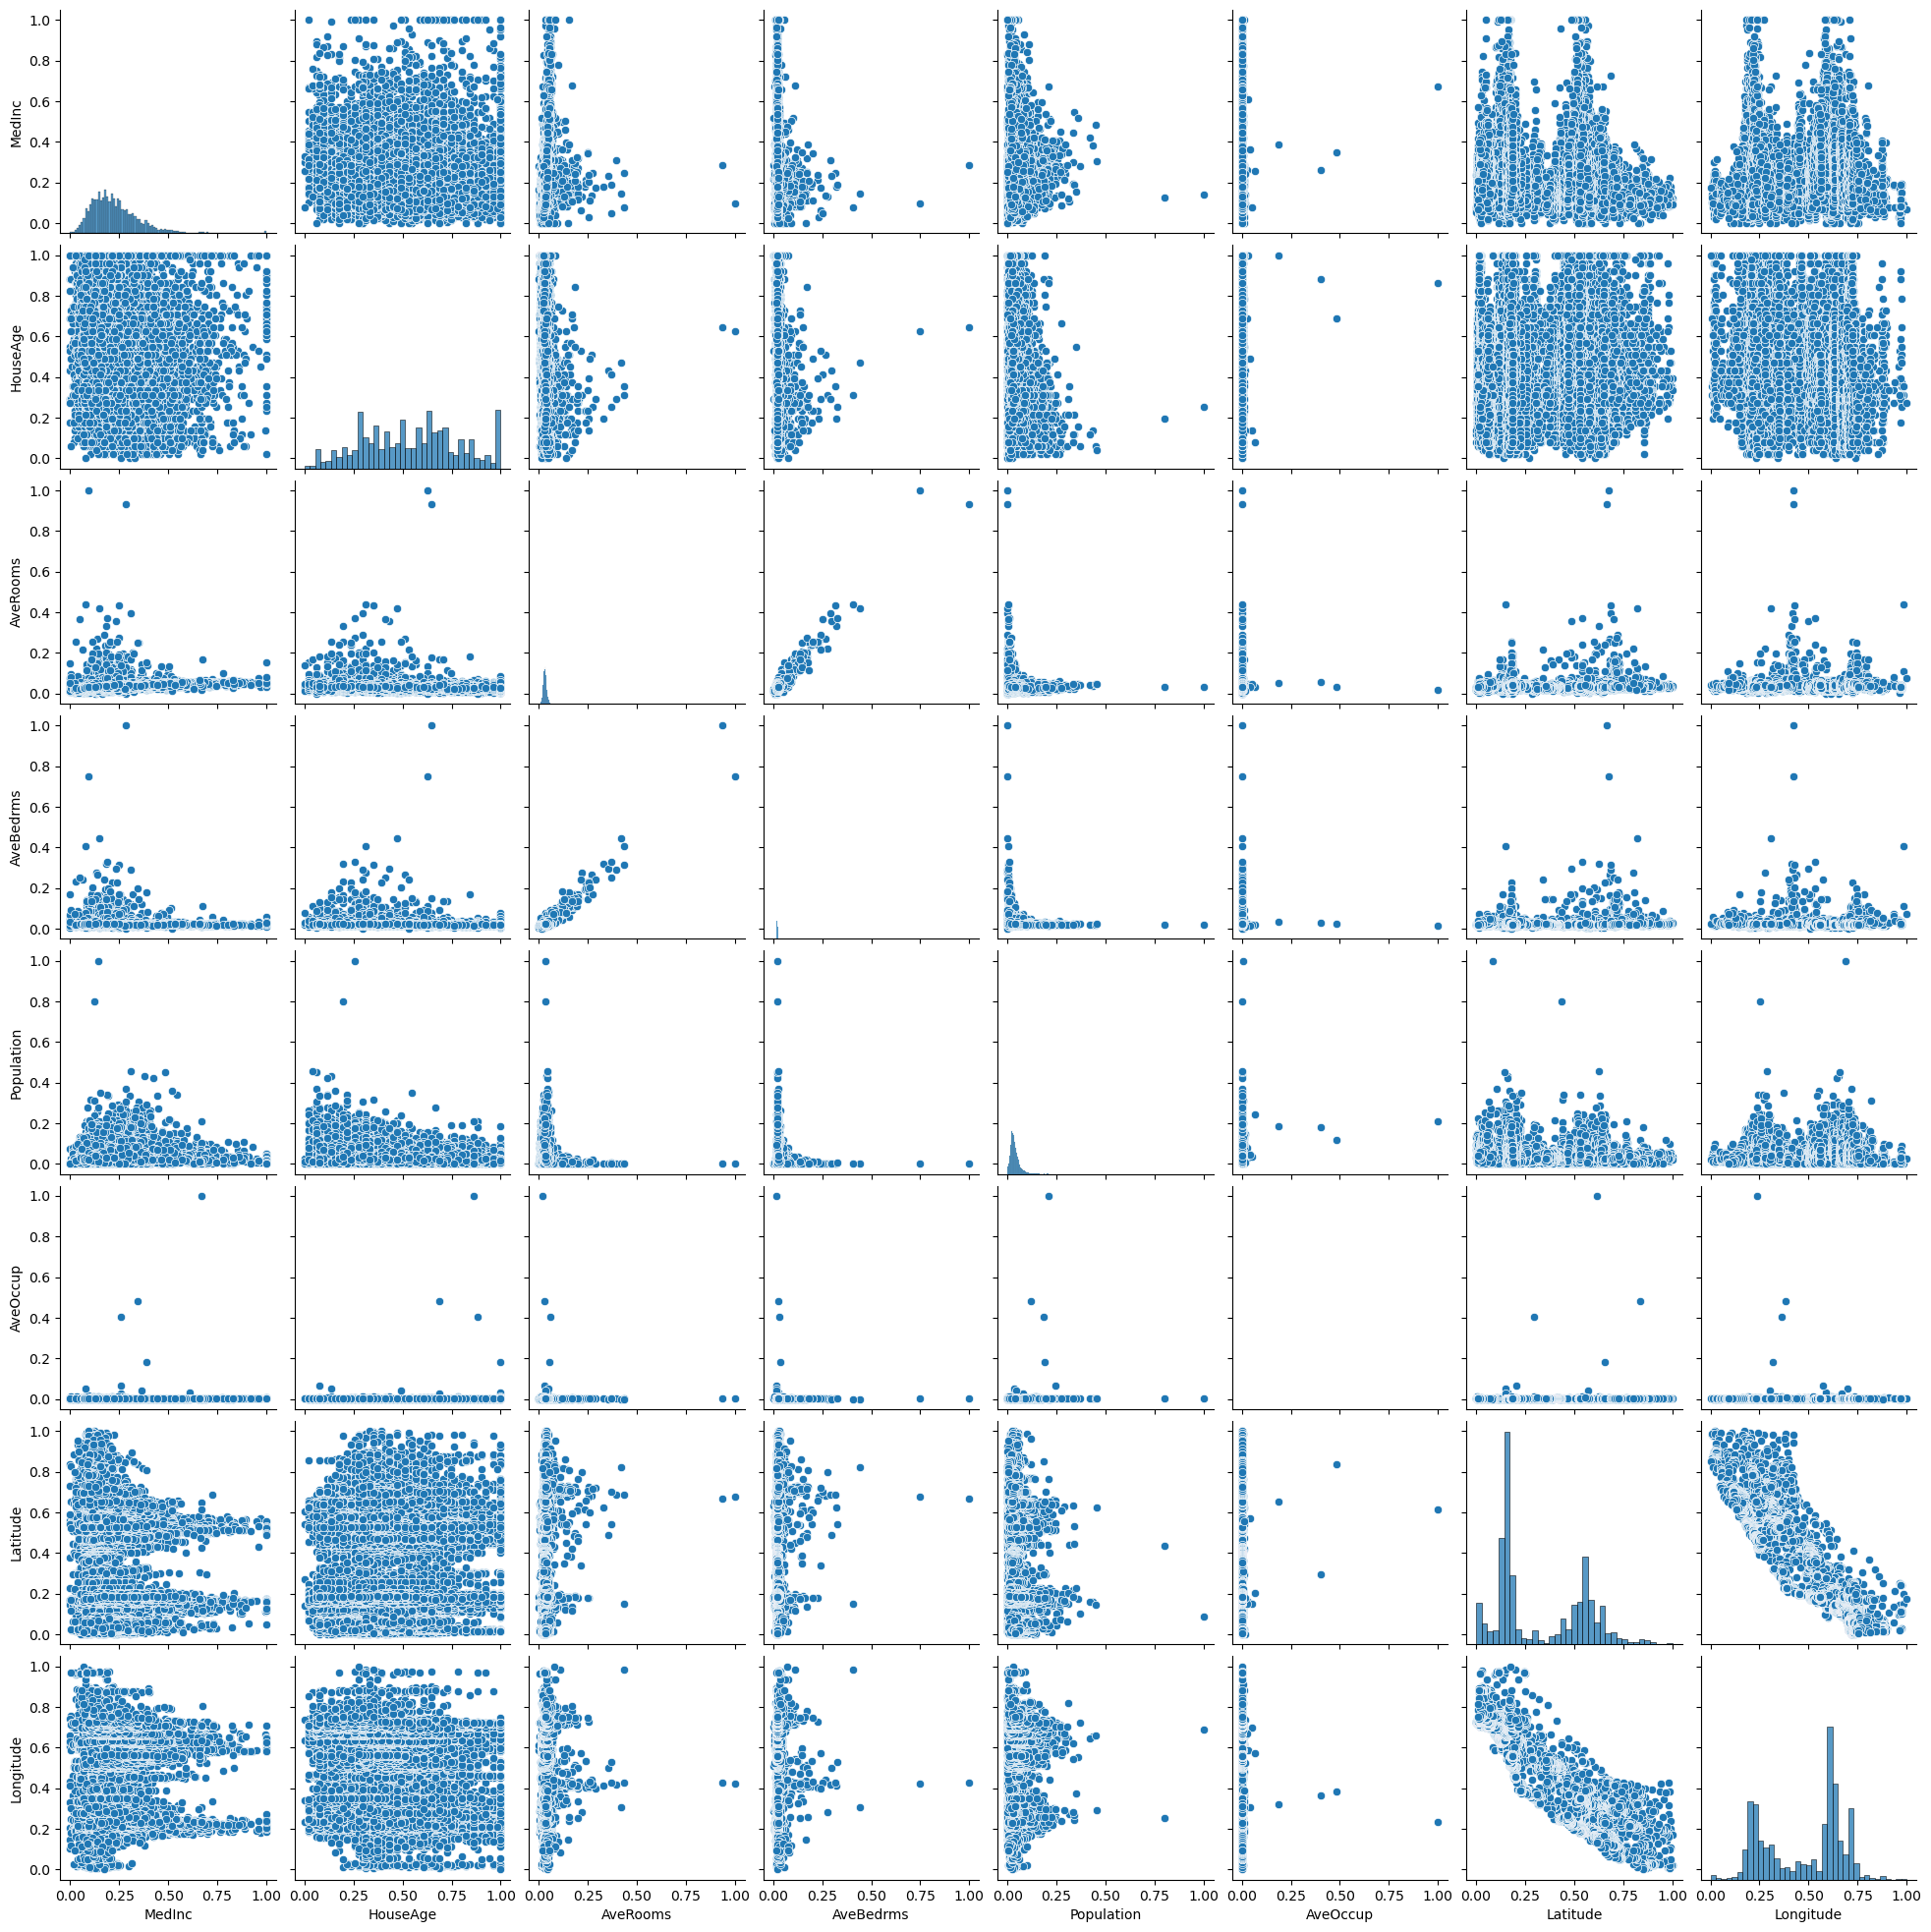

In [41]:
sb.pairplot(data)
plt.show()

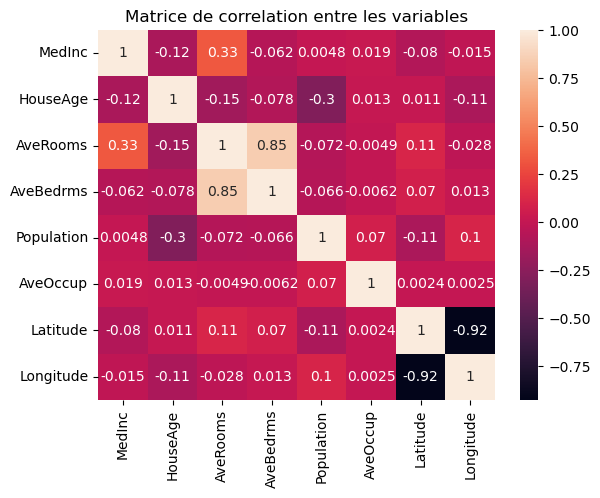

In [23]:
sb.heatmap(data.corr(), annot=True)
plt.title("Matrice de correlation entre les variables")
plt.show()

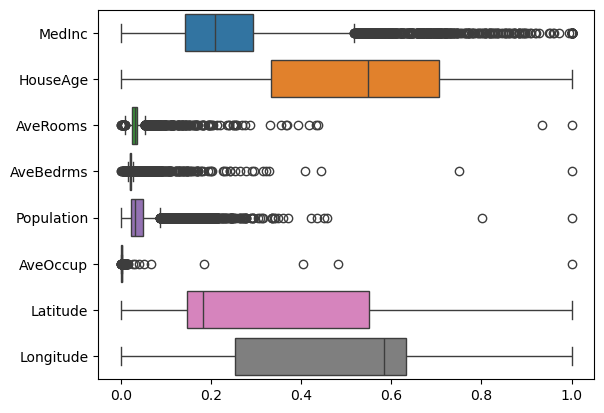

In [24]:
bp = sb.boxplot(data, orient='h')
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [26]:
baselin = DummyRegressor(strategy='mean')
baselin.fit(x_train, y_train)
y_pred = baselin.predict(x_test)

mae = np.mean(np.abs(np.array(y_test) - y_pred))
mse = np.mean((np.array(y_test) - y_pred) ** 2)

print(f"MAE: {mae}, MSE: {mse}")

MAE: 0.1870412632915803, MSE: 0.05610441710594062


In [7]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)

mae = np.mean(np.abs(np.array(y_test) - y_pred))
mse = np.mean((np.array(y_test) - y_pred) ** 2)

print(f"MAE: {mae}, MSE: {mse}")

MAE: 0.11071078600026549, MSE: 0.02242408544701387


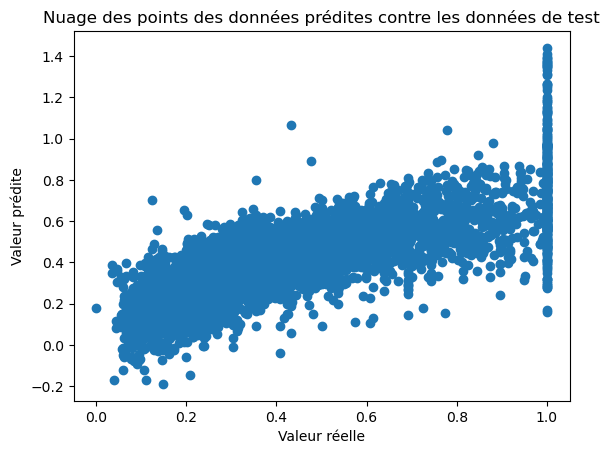

In [8]:
plt.scatter(y_test, y_pred)
plt.title("Nuage des points des données prédites contre les données de test")
plt.xlabel("Valeur réelle")
plt.ylabel("Valeur prédite")
plt.show()

### 1.3.2 Random Forest et Regression logistique: analyde de probabilité de perte de client

In [10]:
data = pd.read_csv("data/Customer Churn.csv", delimiter=',')
data

Call  Failure  Complains  Subscription  Length  Seconds of Use  \
0                 8          0                    38            4370   
1                 0          0                    39             318   
2                10          0                    37            2453   
3                10          0                    38            4198   
4                 3          0                    38            2393   
...             ...        ...                   ...             ...   
3145             21          0                    19            6697   
3146             17          0                    17            9237   
3147             13          0                    18            3157   
3148              7          0                    11            4695   
3149              8          1                    11            1792   

      Frequency of use  Frequency of SMS  Distinct Called Numbers  Status  \
0                   71                 5                       17       1   
1                    5                 7                        4       0   
2                   60               359                       24       1   
3                   66                 1                       35       1   
4                   58                 2                       33       1   
...                ...               ...                      ...     ...   
3145               147                92                       44       1   
3146               177                80                       42       1   
3147                51                38                       21       1   
3148                46               222                       12       1   
3149                25                 7                        9       1   

      Churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
3145      0  
3146      0  
3147      0  
3148      0  
3149      1  

[3150 rows x 9 columns]

In [11]:
labels = data.drop(['Call  Failure', 'Complains', 'Subscription  Length', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Status'], axis=1)
data = data.drop(['Churn'], axis=1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=.2)

In [13]:
model_rfc = RandomForestClassifier(n_estimators=1000)
model_rfc.fit(x_train, y_train.values.ravel())

y_pred = model_rfc.predict(x_test)

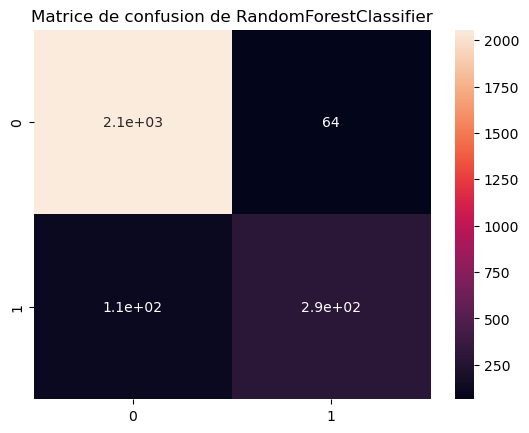

In [33]:
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Matrice de confusion de RandomForestClassifier")
plt.show()

In [34]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

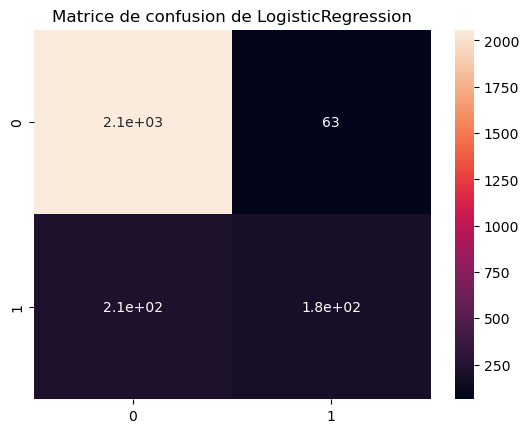

In [35]:
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Matrice de confusion de LogisticRegression")
plt.show()

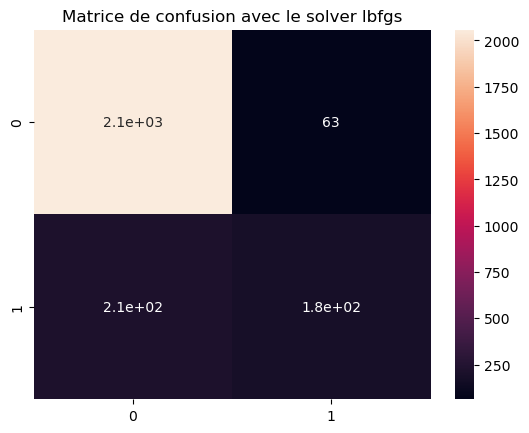

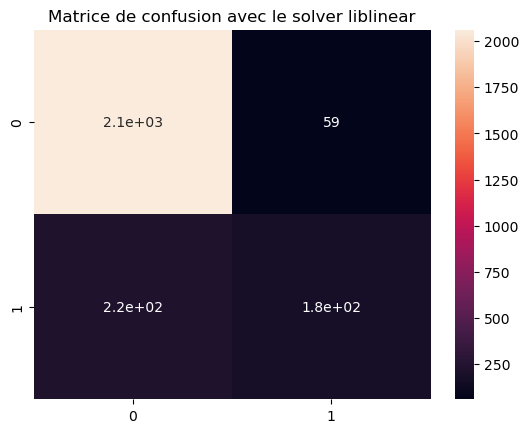

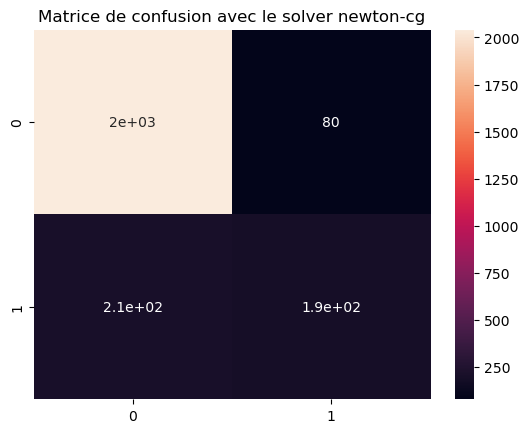

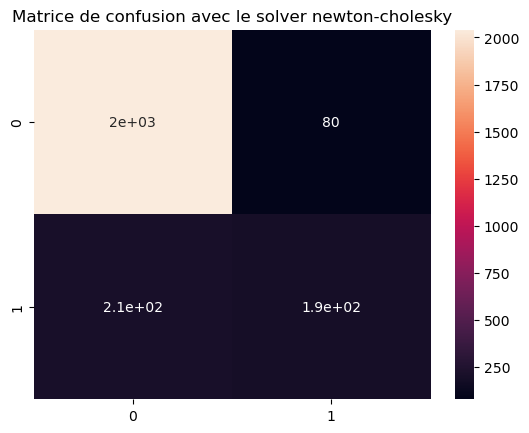

/home/dinos/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


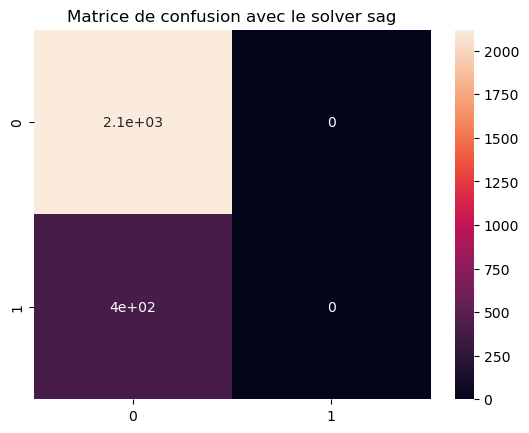

/home/dinos/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


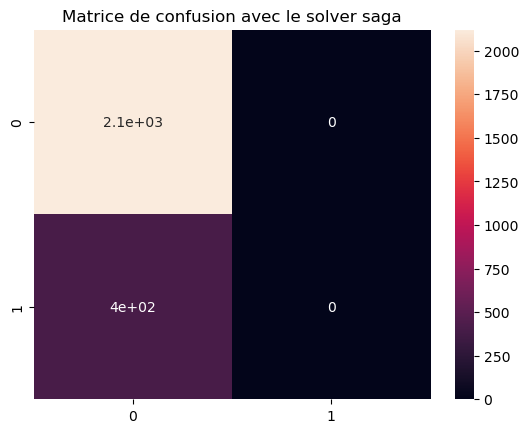

In [36]:
for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    plt.figure()
    sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.title(f"Matrice de confusion avec le solver {solver}")
    plt.show()

### 1.3.3 Analyse du poivoir prédictif des variables

In [9]:
lin_model.coef_

array([[ 1.28002979e+00,  1.05557505e-01, -2.70259339e+00,
         3.97401989e+00,  2.45923722e-03, -1.00516984e+00,
        -8.16887992e-01, -8.97613765e-01]])

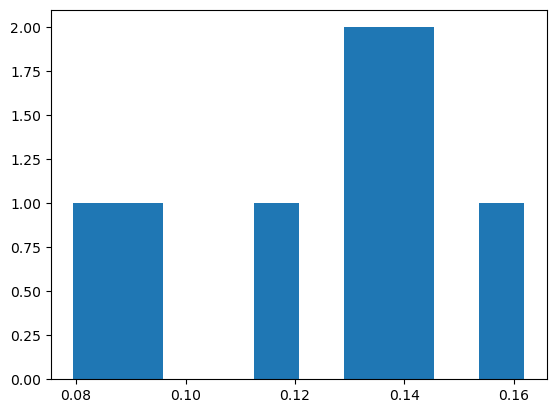

In [26]:
feature_imp = np.sort(model_rfc.feature_importances_)[::-1]

plt.hist(feature_imp)
plt.show()

In [27]:
feature_imp

array([0.1618646 , 0.14422387, 0.14230132, 0.13402735, 0.1329275 ,
       0.11537112, 0.08979026, 0.07949399])